In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [ ]:
df = pd.read_csv("/content/sample_data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#checking nulls
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Data cleaning
df.drop('customerID',inplace=True,axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# change the dtype of totalcharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
# Encode target
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})

# **EDA**

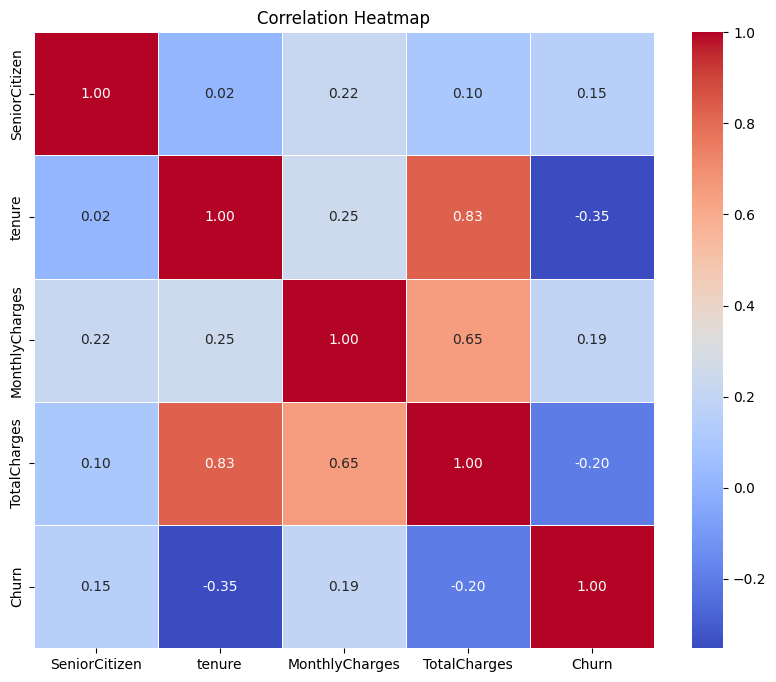

In [ ]:
# correlation
plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(include = [np.number])
sns.heatmap(numeric_df.corr(),annot=True,fmt='.2f',cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

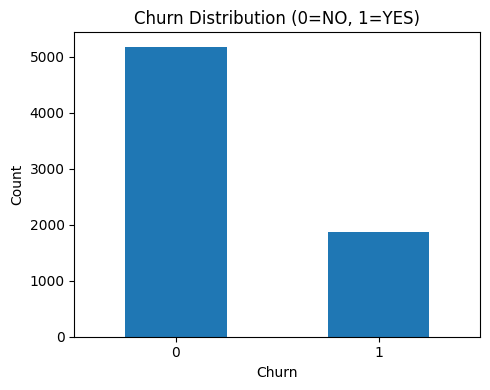

----------------------------------------------------------


,count
Churn,
0,5174
1,1869


In [ ]:
# churn distribution
plt.figure(figsize=(5,4))
df['Churn'].value_counts().plot(kind='bar')
plt.title("Churn Distribution (0=NO, 1=YES)")
plt.xticks(rotation=0)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
print("----------------------------------------------------------")
df['Churn'].value_counts()

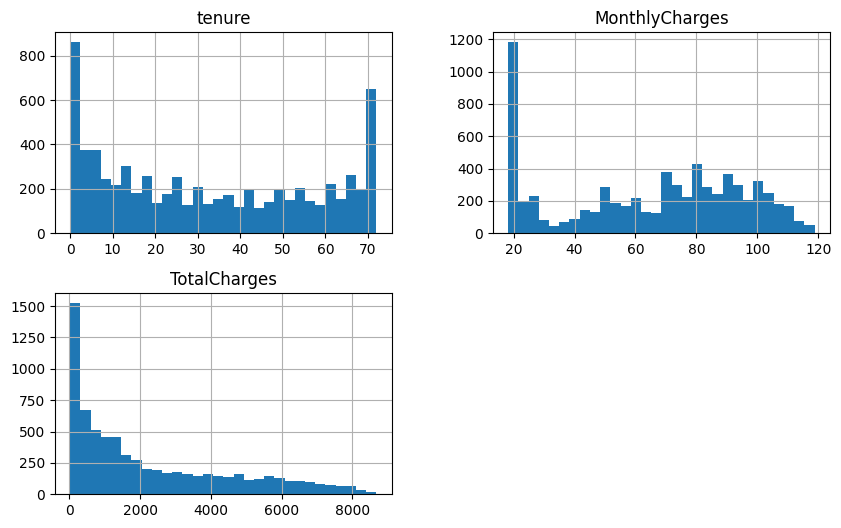

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Numeric features distribution
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numeric_features].hist(figsize=(10, 6),bins=30)
plt.figure(figsize=(12,6))
plt.tight_layout()
plt.show()

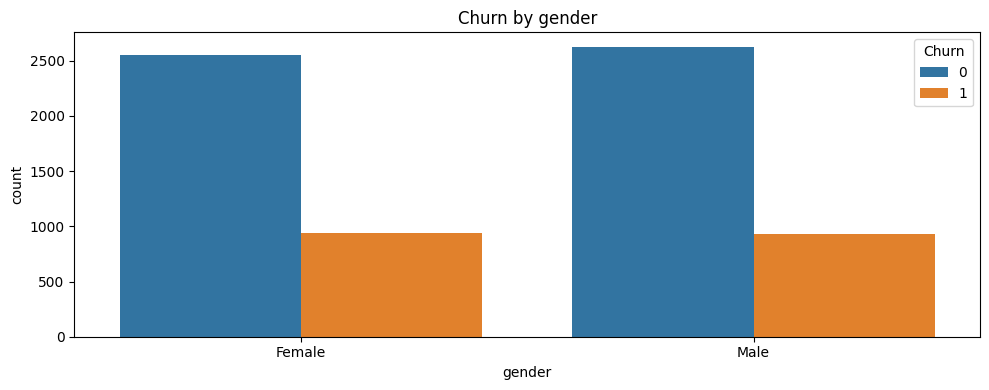

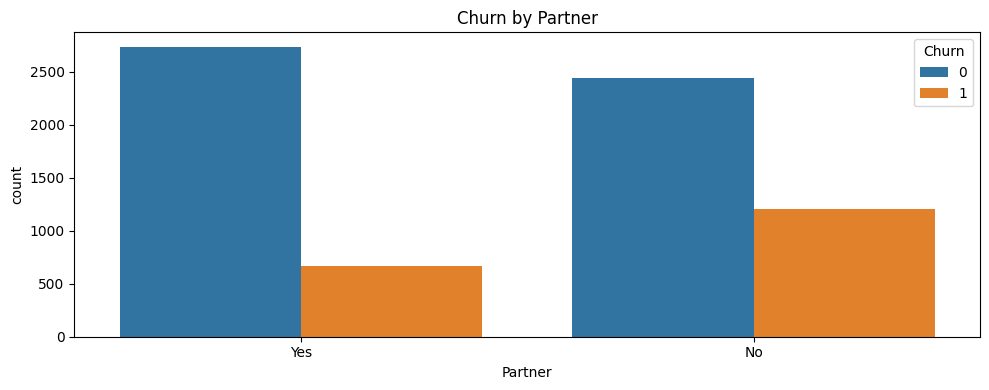

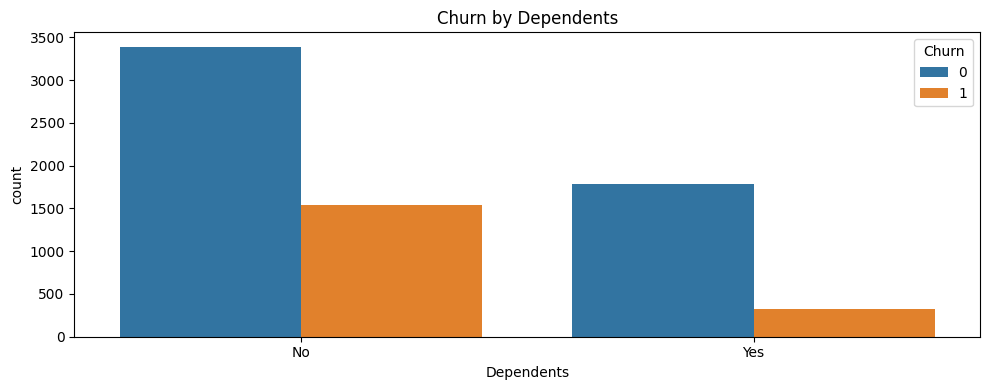

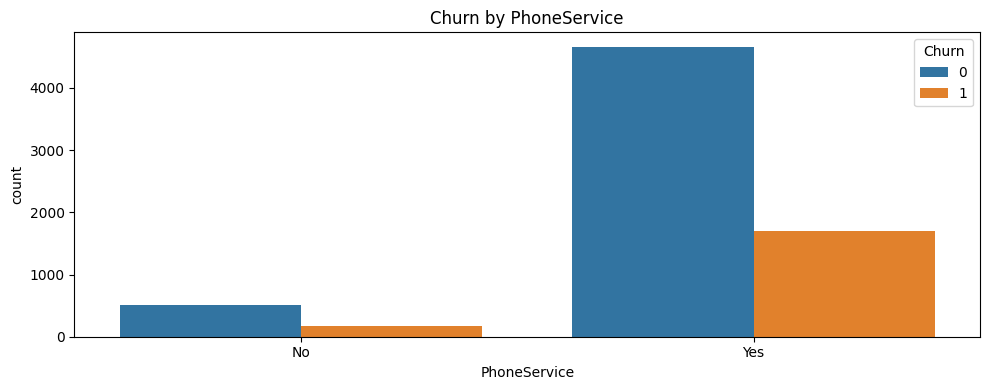

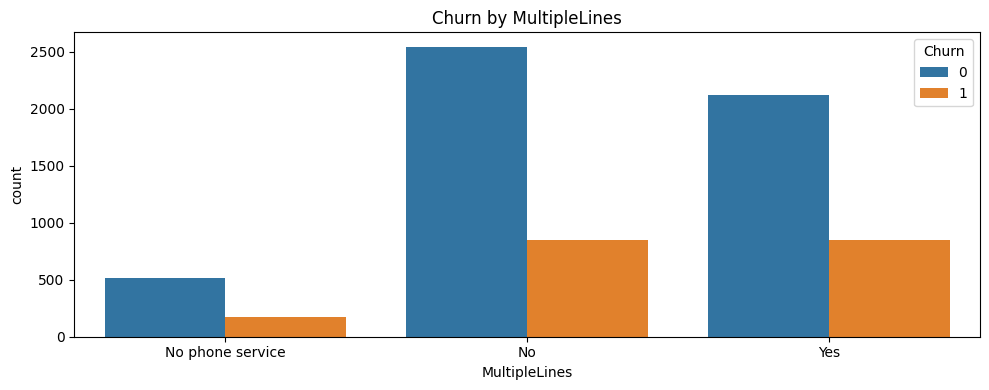

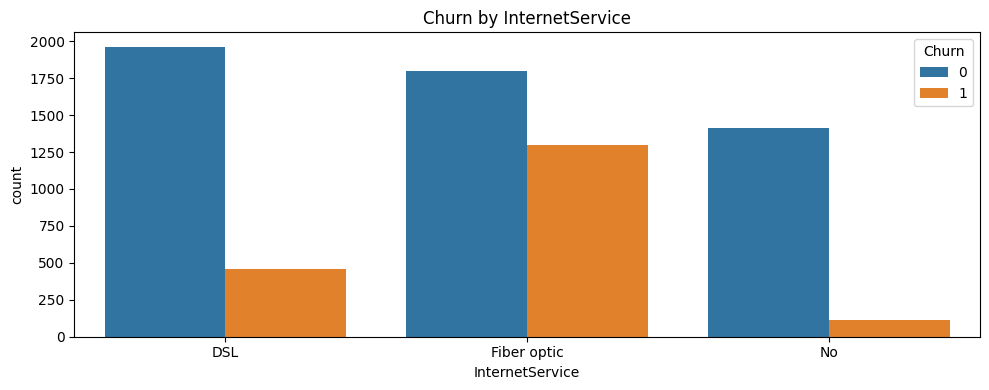

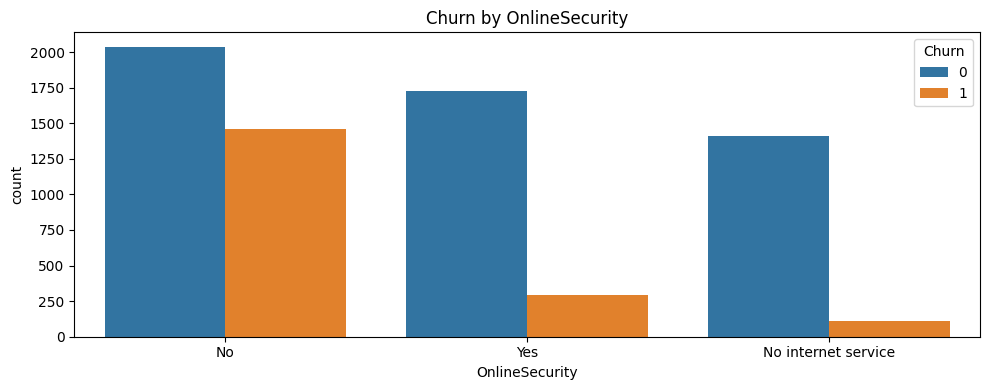

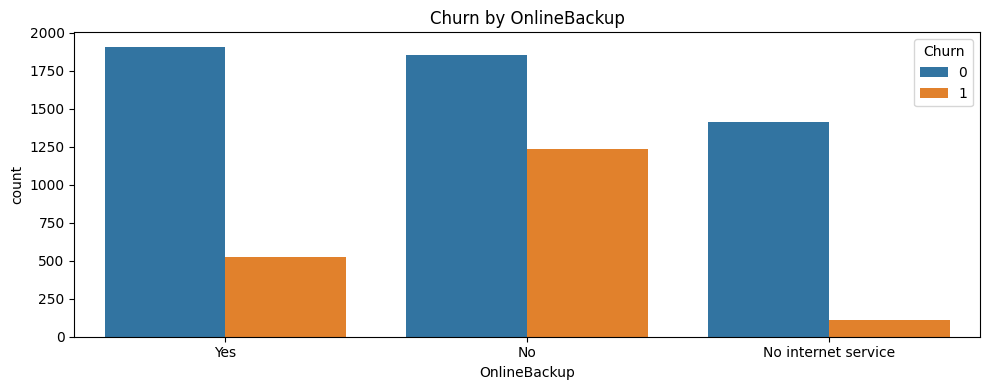

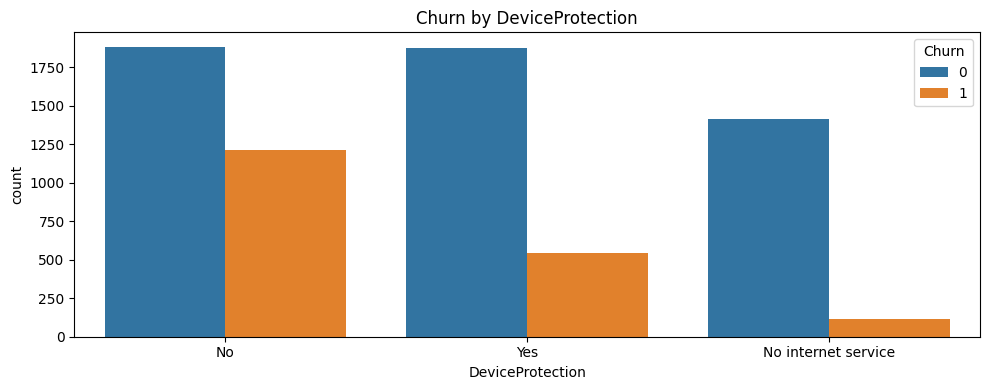

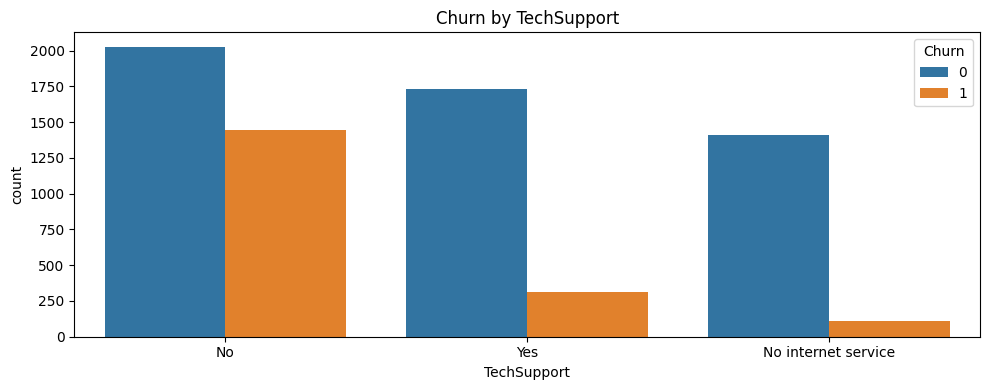

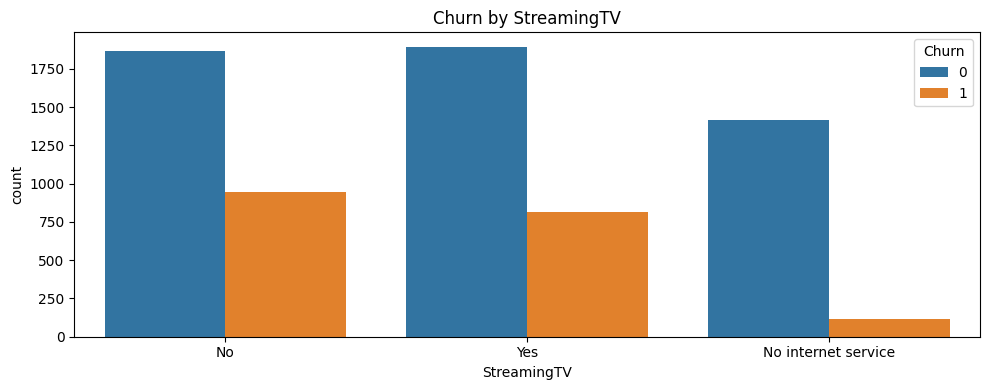

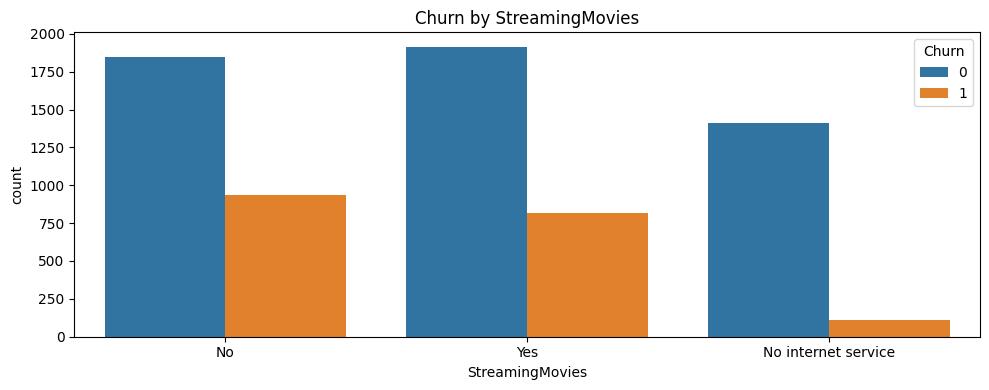

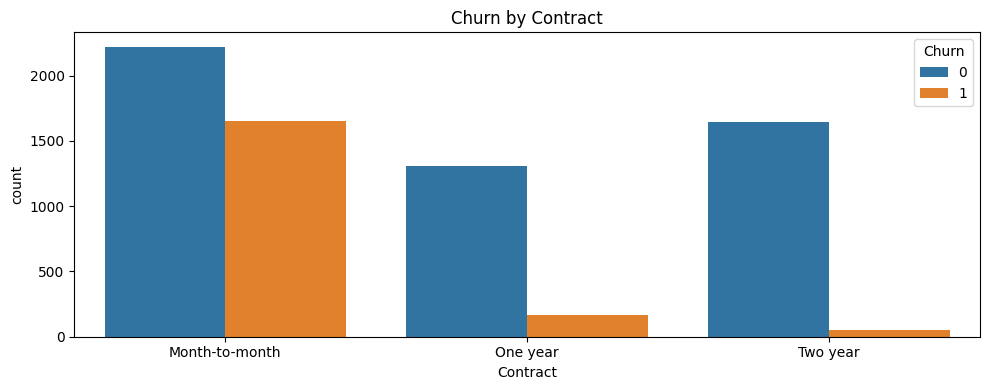

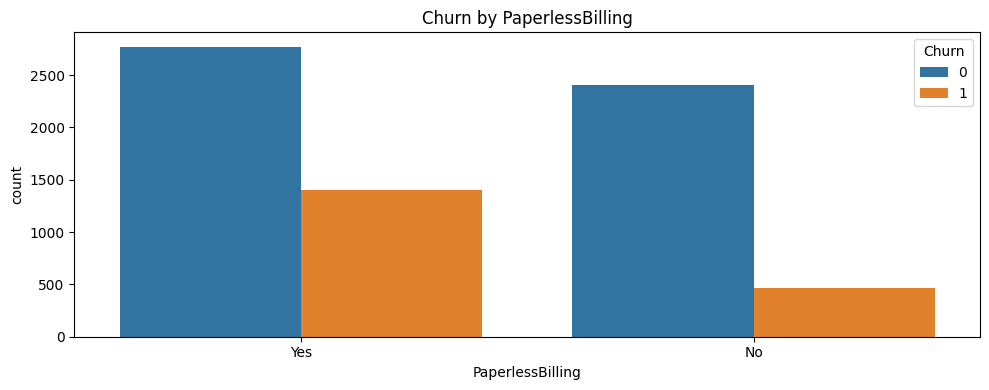

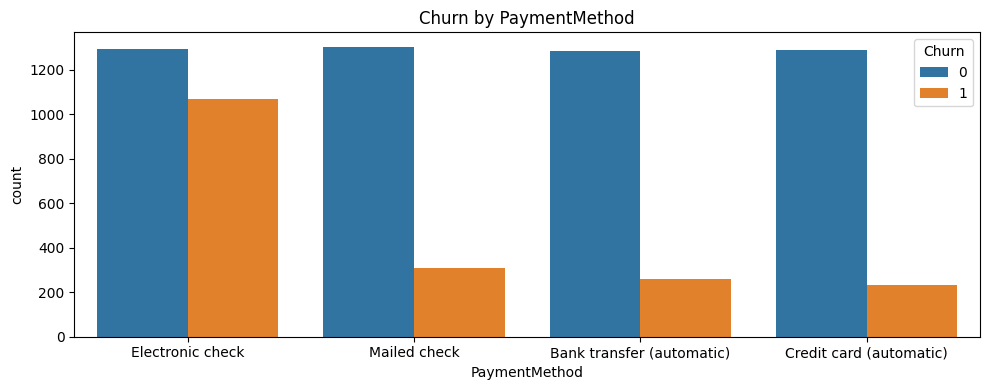

In [ ]:
# churn vs categorical variables
categorical = df.select_dtypes(include = 'object').columns
for col in categorical:
  plt.figure(figsize=(10,4))
  sns.countplot(x=col,hue='Churn',data=df)
  plt.title(f"Churn by {col}")
  plt.tight_layout()
  plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score,roc_curve,recall_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Encoding categorical variables
df= pd.get_dummies(df,columns=categorical,drop_first=True)

In [ ]:
# train test splitting
x = df.drop('Churn',axis=1)
y = df['Churn']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.isnull().sum().sort_values(ascending=False).head(10)

,0
TotalCharges,10
SeniorCitizen,0
tenure,0
MonthlyCharges,0
gender_Male,0
Partner_Yes,0
Dependents_Yes,0
PhoneService_Yes,0
MultipleLines_No phone service,0
MultipleLines_Yes,0


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
x_train = pd.DataFrame(imputer.fit_transform(x_train),columns=x_train.columns)
x_test = pd.DataFrame(imputer.transform(x_test),columns = x_test.columns)

In [ ]:
# feature scaling
scaler = StandardScaler()
x_train[numeric_features] = scaler.fit_transform(x_train[numeric_features])
x_test[numeric_features] = scaler.transform(x_test[numeric_features])

In [ ]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [ ]:
# Model training
models = {"Logistic Regression":LogisticRegression(),
          "Random Forest":RandomForestClassifier(n_estimators=100),
          "XGBoost": XGBClassifier(eval_metric='logloss')}

In [ ]:
# Model Evaluation
for name,model in models.items():
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  y_proba = model.predict_proba(x_test)[:,1]

  print(f"Model: {name}")
  print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
  print(f"Recall: {recall_score(y_test,y_pred)}")
  print(f"ROC AUC: {roc_auc_score(y_test,y_proba)}")
  print(f"Confusion Matrix: {confusion_matrix(y_test,y_pred)}")
  print(f"Classification Report: \n{classification_report(y_test,y_pred)}")
  print("----------------------------------------------------------")


  if name == "Logistic Regression":
        joblib.dump(model, "logistic_regression_model.pkl")
        print("✅ Logistic Regression model saved as 'logistic_regression_model.pkl'")


Model: Logistic Regression
Accuracy: 0.8119233498935415
Recall: 0.5780821917808219
ROC AUC: 0.8408518343567943
Confusion Matrix: [[933 111]
 [154 211]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1044
           1       0.66      0.58      0.61       365

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.74      1409
weighted avg       0.81      0.81      0.81      1409

----------------------------------------------------------
✅ Logistic Regression model saved as 'logistic_regression_model.pkl'
Model: Random Forest
Accuracy: 0.7913413768630234
Recall: 0.4657534246575342
ROC AUC: 0.8156668241221855
Confusion Matrix: [[945  99]
 [195 170]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1044
           1       0.63      0.47      0.54       365

    accuracy                       

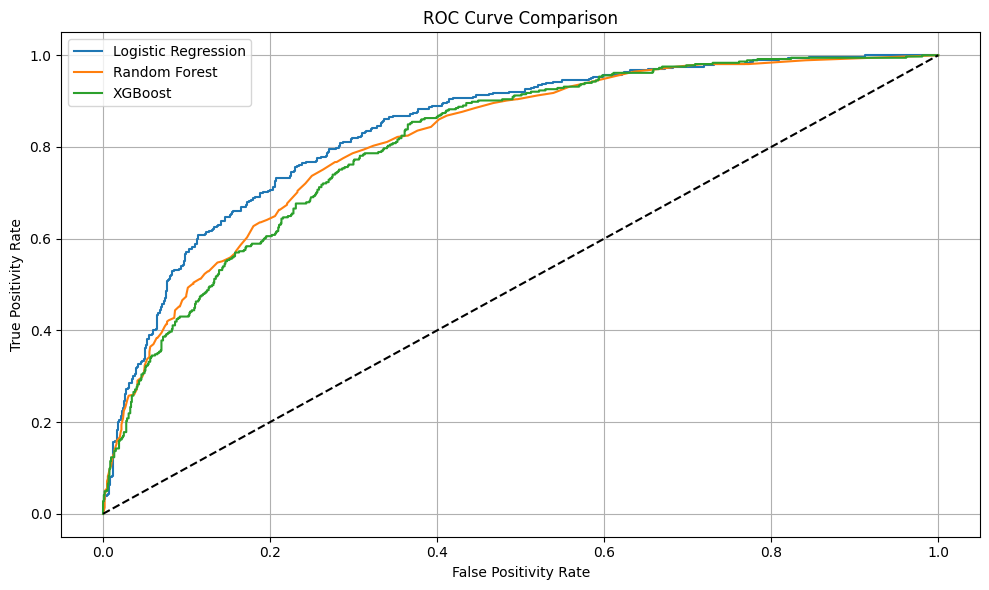

In [ ]:
# plot auc and roc curves
plt.figure(figsize=(10,6))
for name, model in models.items():
  y_proba = model.predict_proba(x_test)[:,1]
  fpr,tpr, _ = roc_curve(y_test,y_proba)
  plt.plot(fpr,tpr,label=f'{name}')

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positivity Rate")
plt.ylabel("True Positivity Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:

import joblib
import pandas as pd

# 1. Load model and scaler
model = joblib.load("logistic_regression_model.pkl")
scaler = joblib.load("scaler.pkl")

# 2. Get expected feature names directly from the model
feature_names = model.feature_names_in_.tolist()

# 3. Define a sample customer input (manually encoded)
sample_input = {
    'tenure': 24,
    'MonthlyCharges': 65.0,
    'TotalCharges': 1560.0,
    'gender_Male': 1,
    'SeniorCitizen': 0,
    'Partner_Yes': 0,
    'Dependents_Yes': 0,
    'PhoneService_Yes': 1,
    'InternetService_Fiber optic': 1,
    'InternetService_No': 0,
    'Contract_One year': 0,
    'Contract_Two year': 1,
    'PaymentMethod_Electronic check': 0,
    'PaymentMethod_Mailed check': 1,
    'PaymentMethod_Credit card (automatic)': 0
}
y_proba
# 4. Create DataFrame
input_df = pd.DataFrame([sample_input])

# 5. Scale numeric columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
input_df[num_cols] = scaler.transform(input_df[num_cols])

# 6. Reorder columns to match model training
input_df = input_df.reindex(columns=feature_names, fill_value=0)

# 7. Predict churn
prediction = model.predict(input_df)[0]
probability = model.predict_proba(input_df)[0][1]

# 8. Output results
print("✅ Prediction:", "Churn" if prediction == 1 else "No Churn")
print("🔢 Churn Probability:", f"{probability:.2%}")




✅ Prediction: No Churn
🔢 Churn Probability: 10.76%


In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.7 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load saved model and scaler
model = joblib.load("logistic_regression_model.pkl")
scaler = joblib.load("scaler.pkl")

# Get expected feature names from the model itself
feature_names = model.feature_names_in_.tolist()  # ✅ No need to load separately

st.title("📉 Customer Churn Prediction (Logistic Regression)")

# User input
gender = st.selectbox("Gender", ["Male", "Female"])
senior = st.selectbox("Senior Citizen", ["No", "Yes"])
partner = st.selectbox("Has Partner", ["Yes", "No"])
dependents = st.selectbox("Has Dependents", ["Yes", "No"])
tenure = st.slider("Tenure (months)", 0, 72, 12)
phone_service = st.selectbox("Phone Service", ["Yes", "No"])
internet_service = st.selectbox("Internet Service", ["DSL", "Fiber optic", "No"])
contract = st.selectbox("Contract Type", ["Month-to-month", "One year", "Two year"])
payment_method = st.selectbox("Payment Method", [
    "Electronic check", "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)"
])
monthly_charges = st.slider("Monthly Charges", 0.0, 120.0, 60.0)
total_charges = st.slider("Total Charges", 0.0, 10000.0, 1500.0)

# Manual encoding
input_data = {
    'tenure': tenure,
    'MonthlyCharges': monthly_charges,
    'TotalCharges': total_charges,
    'gender_Male': 1 if gender == "Male" else 0,
    'SeniorCitizen': 1 if senior == "Yes" else 0,
    'Partner_Yes': 1 if partner == "Yes" else 0,
    'Dependents_Yes': 1 if dependents == "Yes" else 0,
    'PhoneService_Yes': 1 if phone_service == "Yes" else 0,
    'InternetService_Fiber optic': 1 if internet_service == "Fiber optic" else 0,
    'InternetService_No': 1 if internet_service == "No" else 0,
    'Contract_One year': 1 if contract == "One year" else 0,
    'Contract_Two year': 1 if contract == "Two year" else 0,
    'PaymentMethod_Electronic check': 1 if payment_method == "Electronic check" else 0,
    'PaymentMethod_Mailed check': 1 if payment_method == "Mailed check" else 0,
    'PaymentMethod_Credit card (automatic)': 1 if payment_method == "Credit card (automatic)" else 0
}

input_df = pd.DataFrame([input_data])

# Scale numeric features
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
input_df[num_cols] = scaler.transform(input_df[num_cols])

# ✅ Reindex based on model's training features
input_df = input_df.reindex(columns=feature_names, fill_value=0)

# Prediction
if st.button("Predict Churn"):
    prediction = model.predict(input_df)[0]
    probability = model.predict_proba(input_df)[0][1]

    st.subheader("📊 Prediction Result:")
    if prediction == 1:
        st.error(f"❌ The customer is likely to churn.\n\nChurn Probability: **{probability:.2%}**")
    else:
        st.success(f"✅ The customer is not likely to churn.\n\nChurn Probability: **{probability:.2%}**")


Writing app.py


In [ ]:

! pip install streamlit -q
!wget -q -O - ipv4.icanhazip.com
! streamlit run app.py & npx localtunnel --port 8501

34.106.136.137


⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.136.137:8501

⠼⠴⠦⠧⠇⠏⠋Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧your url is: https://flat-cobras-fly.loca.lt
  Stopping...
^C
